In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
from sklearn import metrics

## Data Understanding        

In [14]:
housePrice = pd.read_csv('train.csv', keep_default_na=False, low_memory=False)
housePrice.shape

(1460, 81)

In [15]:
# iterate over each row in the input file
labels = []
for i in housePrice['SalePrice']:
    if(i <= 150000):
        labels.append('LOW')
    elif(i > 150000 and i < 300000):
        labels.append('MEDIUM')
    else:
        labels.append('HIGH')
        
housePrice['PriceLabel'] = labels
housePrice['PriceLabel'] = housePrice['PriceLabel'].astype('category')

In [16]:
# how many elements are there (the attribute Id and salePrice is useless for data minning)
if all([item in housePrice.columns for item in ['Id']]):
    housePrice.drop(['Id'], axis=1, inplace=True)
if all([item in housePrice.columns for item in ['SalePrice']]):
    housePrice.drop(['SalePrice'], axis=1, inplace=True)
housePrice.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [17]:
housePrice.dtypes

MSSubClass          int64
MSZoning           object
LotFrontage        object
LotArea             int64
Street             object
                   ...   
MoSold              int64
YrSold              int64
SaleType           object
SaleCondition      object
PriceLabel       category
Length: 80, dtype: object

In [18]:
housePrice['PriceLabel'].unique()

['MEDIUM', 'LOW', 'HIGH']
Categories (3, object): ['MEDIUM', 'LOW', 'HIGH']

In [19]:
housePrice['PriceLabel']

0       MEDIUM
1       MEDIUM
2       MEDIUM
3          LOW
4       MEDIUM
         ...  
1455    MEDIUM
1456    MEDIUM
1457    MEDIUM
1458       LOW
1459       LOW
Name: PriceLabel, Length: 1460, dtype: category
Categories (3, object): ['HIGH', 'LOW', 'MEDIUM']

In [20]:
housePrice['PriceLabel'].value_counts()

MEDIUM    726
LOW       619
HIGH      115
Name: PriceLabel, dtype: int64

In [21]:
housePrice.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0


In [22]:
housePrice['MSSubClass'].mean()

56.897260273972606

In [23]:
housePrice.isnull()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PriceLabel
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
housePrice.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
PriceLabel       0
Length: 80, dtype: int64

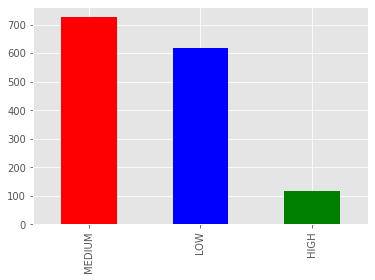

In [25]:
housePrice['PriceLabel'].value_counts().plot(kind = 'bar', color = ['red', 'blue', 'green'])
plt.show()

Balanced dataset shape: (345, 80)


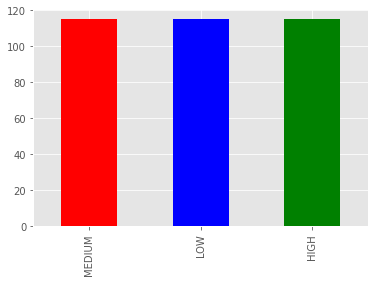

In [26]:
from sklearn.utils import resample
housePrice_low = housePrice[housePrice.PriceLabel=='LOW']
housePrice_medium = housePrice[housePrice.PriceLabel=='MEDIUM']
housePrice_high = housePrice[housePrice.PriceLabel=='HIGH']
housePrice_low_downsampled = resample(housePrice_low,
                                   replace=False,
                                   n_samples=len(housePrice_high),
                                   random_state=42)

housePrice_medium_downsampled = resample(housePrice_medium,
                                   replace=False,
                                   n_samples=len(housePrice_high),
                                   random_state=42)

housePrice_balanced = pd.concat([housePrice_low_downsampled, housePrice_high,housePrice_medium_downsampled])

print(f'Balanced dataset shape: {housePrice_balanced.shape}')
housePrice_balanced['PriceLabel'].value_counts().plot(kind = 'bar', color = ['red', 'blue', 'green'])
plt.show()

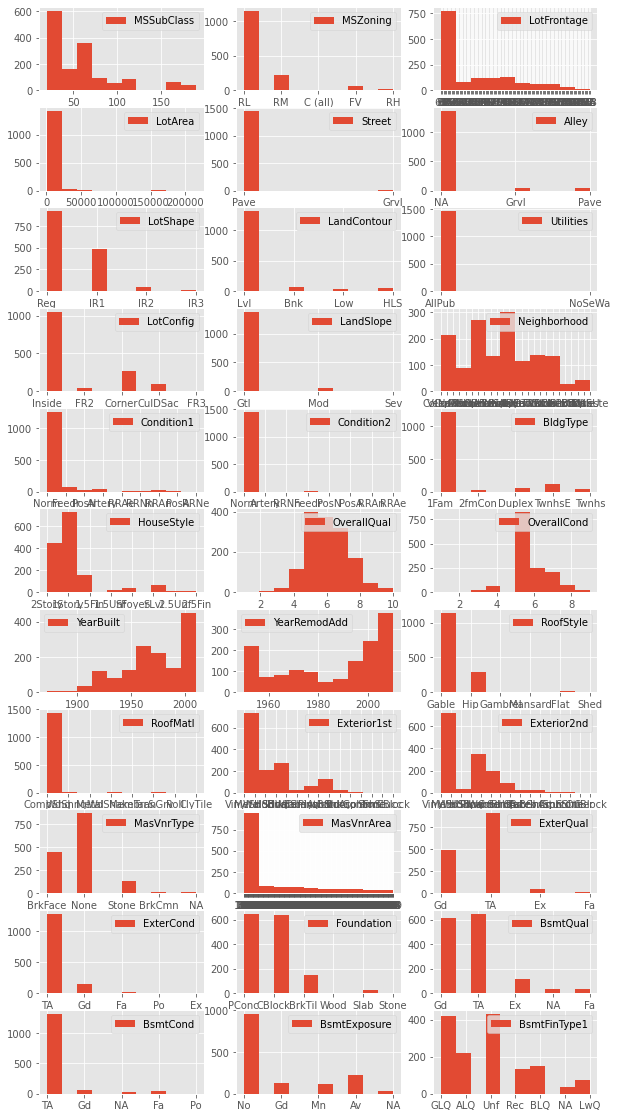

In [27]:
# set the value to object which shows in number(eg. MSSubClass is number but represent as catagory)
housePrice['MSSubClass'] = housePrice['MSSubClass'].astype(object)
    

# plot the Histogram
fig, ax = plt.subplots(11, 3, figsize = (10, 20))
series_list = []
for col in housePrice.columns:
    series_list.append(housePrice[col])
index = 0
for i in range(11):
    for j in range(3):
        series_list[index].hist(ax = ax[i, j], legend=True)
        index += 1
plt.show()

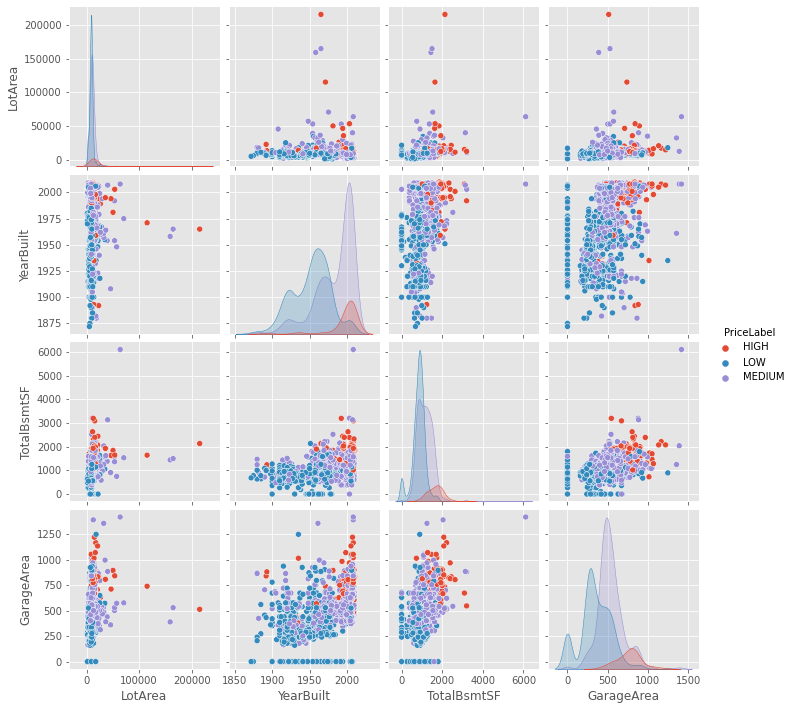

In [28]:
data = housePrice[['LotFrontage', 'LotArea', 'YearBuilt', 'TotalBsmtSF', 'GarageArea','Neighborhood','PriceLabel']]
sn.pairplot(data, hue = 'PriceLabel')
plt.show()

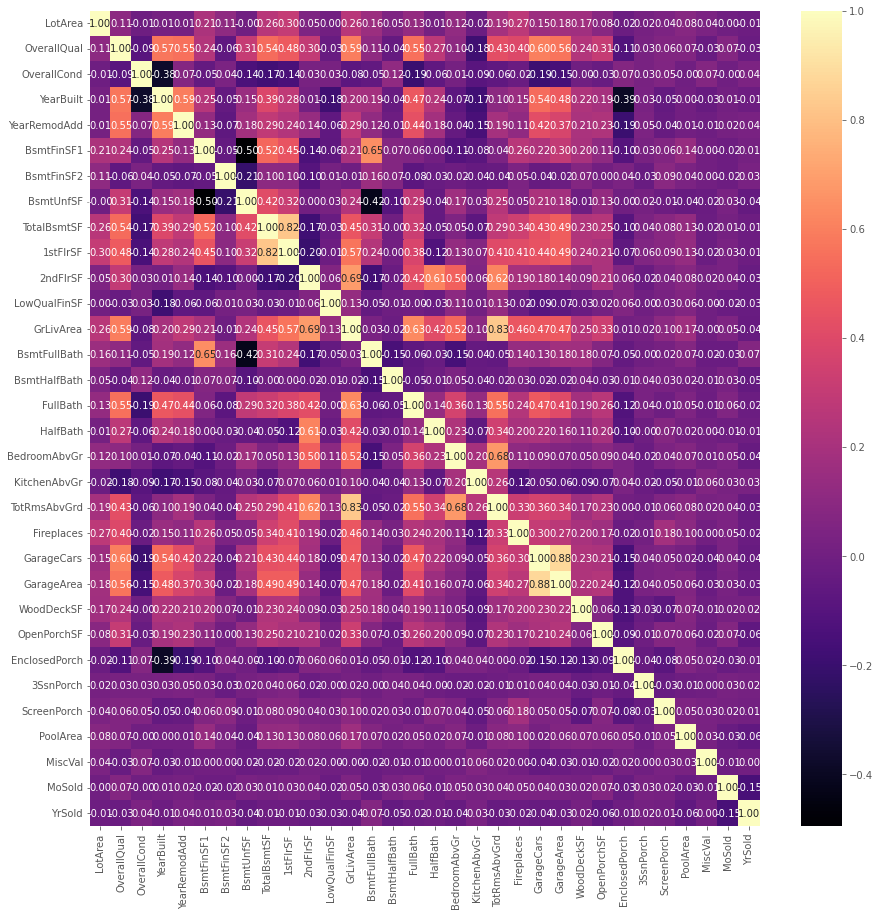

In [29]:
plt.figure(figsize = (15, 15))
sn.heatmap(housePrice.corr(), annot=True, cmap='magma', fmt='.2f')
plt.show()

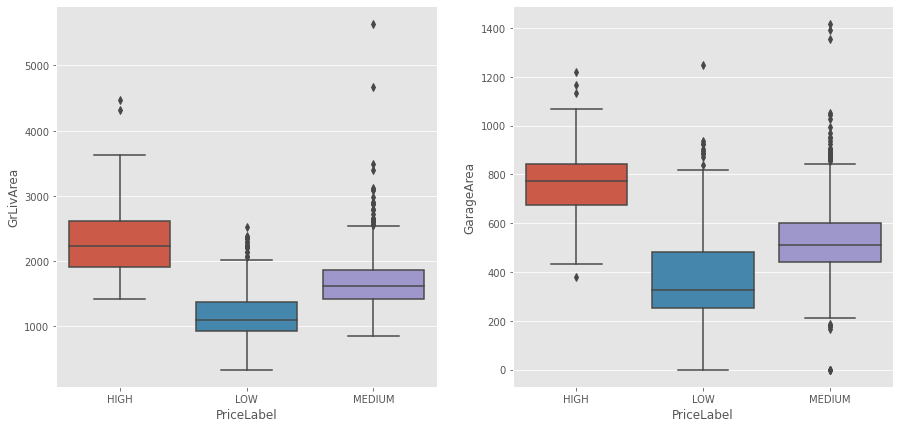

In [30]:
# 6.2 box plot
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sn.boxplot(y = 'GrLivArea', x = 'PriceLabel', data = housePrice, ax = ax[0])
sn.boxplot(y = 'GarageArea', x = 'PriceLabel', data = housePrice, ax = ax[1])

plt.show()

# Data preparation

## 1. Data Cleaning
### 1.1 Fill in missing values

In [31]:
housePrice.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
PriceLabel       0
Length: 80, dtype: int64

**There does not exist missing value**

### 1.2. Identify and remove noise

In [32]:
housePrice.dtypes

MSSubClass         object
MSZoning           object
LotFrontage        object
LotArea             int64
Street             object
                   ...   
MoSold              int64
YrSold              int64
SaleType           object
SaleCondition      object
PriceLabel       category
Length: 80, dtype: object

In [33]:
# find out if the str attribute are same to the author's version. 
for column in housePrice:
    if(housePrice.dtypes[column] == 'object'):
        columnSeriesObj = housePrice[column]
        unique_list = list(set(columnSeriesObj.values))
        #print(column , ":",unique_list)

In [34]:
housePrice['LotFrontage'].replace('NA', 0, inplace=True)
housePrice['LotFrontage'] = housePrice['LotFrontage'].astype(float)
housePrice['LotFrontage'].replace(0, housePrice['LotFrontage'].mean(), inplace=True)

housePrice['MasVnrArea'].replace('NA', 0, inplace=True)
housePrice['MasVnrArea'] = housePrice['MasVnrArea'].astype(float)
housePrice['MasVnrArea'].replace(0, housePrice['MasVnrArea'].mean(), inplace=True)

housePrice['GarageYrBlt'].replace('NA', 0, inplace=True)
housePrice['GarageYrBlt'] = housePrice['GarageYrBlt'].astype(float)
housePrice['GarageYrBlt'].replace(0, housePrice['GarageYrBlt'].mean(), inplace=True)


    
    
# find out if the str attribute are same to the author's version. 
# Check the result again
for column in housePrice:
    if(housePrice.dtypes[column] == 'object'):
        columnSeriesObj = housePrice[column]
        unique_list = list(set(columnSeriesObj.values))
        #print(column , ":",unique_list)

In [35]:
for column in housePrice:
    if(housePrice.dtypes[column] == 'int64'):
        columnSeriesObj = housePrice[column]
        unique_list = list(set(columnSeriesObj.values))
        #print(column , ":",unique_list)

### 1.3 correct inconsistencies
**Because there only one dataset, so does not exist inconsistencies problem.**

### 2. Data integration
#### 2.1 Merge data from multiple sources.

In [36]:
import math

def entropy(labels):
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    # Convert labels to integers
    label_dict = {label: i for i, label in enumerate(set(labels))}
    labels = [label_dict[label] for label in labels]

    counts = np.bincount(labels)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.

    # Compute entropy
    for i in probs:
        ent -= i * math.log(i, n_classes)

    return ent

In [37]:
# Feature Subset Selection - remove the irrelevant or redundant features

for val in housePrice:
    if(entropy(housePrice[val]) < 0.2):
        print(val)
        housePrice.drop([val], axis=1, inplace=True)

Street
Utilities
Condition2
RoofMatl
BsmtFinSF2
Heating
Electrical
LowQualFinSF
KitchenAbvGr
Functional
3SsnPorch
ScreenPorch
PoolArea
PoolQC
MiscFeature
MiscVal


In [38]:
housePrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   object  
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Alley          1460 non-null   object  
 5   LotShape       1460 non-null   object  
 6   LandContour    1460 non-null   object  
 7   LotConfig      1460 non-null   object  
 8   LandSlope      1460 non-null   object  
 9   Neighborhood   1460 non-null   object  
 10  Condition1     1460 non-null   object  
 11  BldgType       1460 non-null   object  
 12  HouseStyle     1460 non-null   object  
 13  OverallQual    1460 non-null   int64   
 14  OverallCond    1460 non-null   int64   
 15  YearBuilt      1460 non-null   int64   
 16  YearRemodAdd   1460 non-null   int64   
 17  RoofStyle      1460 non-null   ob

In [39]:
# Feature creation
# conbine OverallQual+OverallCond 
# OverallQual: Rates the overall material and finish of the house
# OverallCond: Rates the overall condition of the house
housePrice['OverallQualCond'] = housePrice['OverallQual'] + housePrice['OverallCond']
housePrice.drop(['OverallQual'], axis=1, inplace=True)
housePrice.drop(['OverallCond'], axis=1, inplace=True)

# aggregation operation on quantitative attribute
# todo
housePrice.groupby(['YearBuilt']).mean()


,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,OverallQualCond
YearBuilt,,,,,,,,,,,,,,,,,,,,,
1872,50.000000,5250.000000,1987.000000,103.117123,259.000000,425.000000,684.000000,938.000000,1215.000000,2358.000000,...,0.000000,1868.739726,0.000000,0.000000,0.000000,54.000000,20.000000,12.000000,2008.000000,13.000000
1875,54.000000,6342.000000,1996.000000,103.117123,0.000000,780.000000,780.000000,780.000000,240.000000,1020.000000,...,0.000000,1868.739726,0.000000,0.000000,0.000000,0.000000,176.000000,5.000000,2010.000000,13.000000
1880,73.000000,12246.500000,1986.500000,103.117123,0.000000,1088.500000,1088.500000,1315.500000,1207.750000,2523.250000,...,0.500000,1955.000000,2.250000,544.750000,120.750000,12.000000,169.750000,5.250000,2007.500000,12.750000
1882,121.000000,17671.000000,1986.000000,103.117123,216.000000,700.000000,916.000000,916.000000,826.000000,1742.000000,...,1.000000,1925.000000,2.000000,424.000000,0.000000,169.000000,0.000000,11.000000,2009.000000,17.000000
1885,60.000000,11070.000000,1972.500000,103.117123,0.000000,709.000000,709.000000,1146.500000,522.000000,1668.500000,...,0.000000,1962.500000,1.500000,416.500000,0.000000,0.000000,57.000000,6.000000,2008.500000,10.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,76.417910,10402.432836,2006.313433,207.735514,333.223881,1022.805970,1356.029851,1371.283582,304.134328,1675.417910,...,0.761194,2004.115518,2.492537,677.537313,127.626866,67.701493,0.552239,7.000000,2006.970149,12.567164
2007,78.224490,10456.306122,2007.306122,209.877369,500.224490,950.142857,1450.367347,1461.714286,259.734694,1721.448980,...,0.612245,2004.362035,2.510204,678.040816,107.448980,82.244898,0.000000,7.040816,2007.836735,12.816327
2008,92.260870,14081.956522,2008.304348,329.053663,831.217391,1028.173913,1882.826087,1801.565217,341.565217,2143.130435,...,1.000000,2008.217391,2.739130,855.130435,104.347826,99.913043,0.000000,6.304348,2008.826087,13.652174


In [40]:
housePrice.dtypes

MSSubClass           object
MSZoning             object
LotFrontage         float64
LotArea               int64
Alley                object
                     ...   
YrSold                int64
SaleType             object
SaleCondition        object
PriceLabel         category
OverallQualCond       int64
Length: 63, dtype: object

### 3. Data Transformation
#### 3.1 Normalization


In [41]:
housePrice

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,PriceLabel,OverallQualCond
0,60,RL,65.0,8450,NA,Reg,Lvl,Inside,Gtl,CollgCr,...,0,61,0,NA,2,2008,WD,Normal,MEDIUM,12
1,20,RL,80.0,9600,NA,Reg,Lvl,FR2,Gtl,Veenker,...,298,0,0,NA,5,2007,WD,Normal,MEDIUM,14
2,60,RL,68.0,11250,NA,IR1,Lvl,Inside,Gtl,CollgCr,...,0,42,0,NA,9,2008,WD,Normal,MEDIUM,12
3,70,RL,60.0,9550,NA,IR1,Lvl,Corner,Gtl,Crawfor,...,0,35,272,NA,2,2006,WD,Abnorml,LOW,12
4,60,RL,84.0,14260,NA,IR1,Lvl,FR2,Gtl,NoRidge,...,192,84,0,NA,12,2008,WD,Normal,MEDIUM,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,NA,Reg,Lvl,Inside,Gtl,Gilbert,...,0,40,0,NA,8,2007,WD,Normal,MEDIUM,11
1456,20,RL,85.0,13175,NA,Reg,Lvl,Inside,Gtl,NWAmes,...,349,0,0,MnPrv,2,2010,WD,Normal,MEDIUM,12
1457,70,RL,66.0,9042,NA,Reg,Lvl,Inside,Gtl,Crawfor,...,0,60,0,GdPrv,5,2010,WD,Normal,MEDIUM,16
1458,20,RL,68.0,9717,NA,Reg,Lvl,Inside,Gtl,NAmes,...,366,0,112,NA,4,2010,WD,Normal,LOW,11


## Modeling

### Random Forest

In [42]:
models = []

In [43]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sn.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

In [44]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from joblib import dump
import random

X = housePrice.drop('PriceLabel', axis=1)
y = housePrice['PriceLabel']

ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(X)
X = X_encoded

kf = KFold(n_splits=5)
# the n_estimators parameter specifies the number of decision trees in the random forest
rfc = RandomForestClassifier(n_estimators=30)
best_score = 0


for train_index, test_index in kf.split(X):
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train, X_test = X[train_index], X[test_index]

    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    if score > best_score:
        best_score = score
        best_model = rfc
        print(best_score)
    
dump(best_model, 'random_forest.joblib')

0.8321917808219178
0.8938356164383562


['random_forest.joblib']

In [45]:
from sklearn.metrics import confusion_matrix
import joblib

# Load the saved model
model = joblib.load('random_forest.joblib')

# Predict the test data
y_pred = model.predict(X_test)

models.append(("Random Forest", model, model.predict_proba(X_test), y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix\n',cm)


confusion_matrix
 [[  9   0  10]
 [  0 116   9]
 [  1  22 125]]


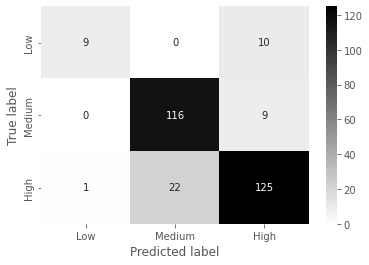

In [46]:
categories = ['Low', 'Medium', 'High']
make_confusion_matrix(confusion_matrix(y_test, y_pred), categories=categories, cmap='binary')

In [47]:
#print('Accuracy:', accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Randomforest report')
print(classification_report(y_test, y_pred))

Accuracy: 0.8561643835616438
Randomforest report
              precision    recall  f1-score   support

        HIGH       0.90      0.47      0.62        19
         LOW       0.84      0.93      0.88       125
      MEDIUM       0.87      0.84      0.86       148

    accuracy                           0.86       292
   macro avg       0.87      0.75      0.79       292
weighted avg       0.86      0.86      0.85       292



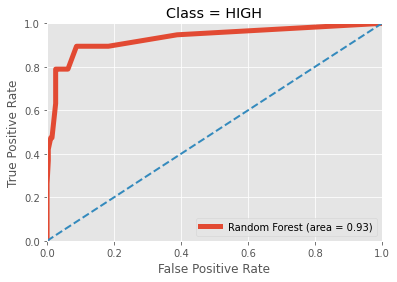

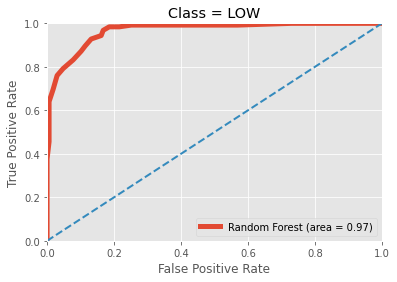

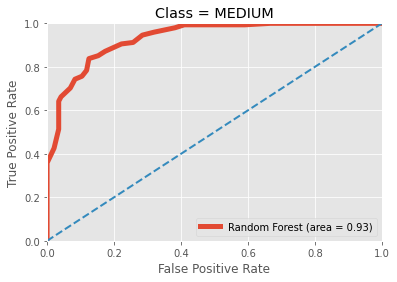

In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

one_hot_encoding = np.array(pd.get_dummies(y_test, columns = ['PriceLabel']))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], model.predict_proba(X_test)[:, i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=5, label="Random Forest" + f' (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show() 

### Neural Network

Converting categorical values into numeric using the sklearn library and in particular the OneHotEncoding class

In [49]:
X = housePrice.drop('PriceLabel', axis=1)
y = housePrice['PriceLabel']

ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(X)
X = X_encoded



Creating a training set and a test set

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(1022, 7299)
(438, 7299)


Creation of the neural network with parameters tested on different ranges. As an activation function we use 'relu' because it fits better with our training set as a solver we use 'sgd'. The parameters alpha, can be used to control possible 'overfitting' and 'underfitting has been chosen over a range as well as tolerance.

mlp.fit allows you to fit the model to the training data
mlp.predict allows you to predict the training and test set

In [51]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(5,5), 
                        activation='relu', 
                        random_state=1,
                        alpha=0.030888435964774818,
                        max_iter=500,
                        solver='sgd', 
                        tol=1e-5,
                        learning_rate_init=0.1, 
                        verbose=False)

mlp.fit(X_train,y_train)

predict_train_mlp = mlp.predict(X_train)
predict_test_mlp = mlp.predict(X_test)

models.append(("Neural Network", mlp, mlp.predict_proba(X_test), y_test, mlp.predict(X_test)))

In [52]:
from sklearn.metrics import classification_report
print("PREDICTION TRAINING SET")
print(confusion_matrix(y_train,predict_train_mlp))
print(classification_report(y_train,predict_train_mlp))

PREDICTION TRAINING SET
[[ 90   0   0]
 [  1 442   3]
 [  3   1 482]]
              precision    recall  f1-score   support

        HIGH       0.96      1.00      0.98        90
         LOW       1.00      0.99      0.99       446
      MEDIUM       0.99      0.99      0.99       486

    accuracy                           0.99      1022
   macro avg       0.98      0.99      0.99      1022
weighted avg       0.99      0.99      0.99      1022



In [53]:
print("PREDICTION TEST SET")
print(confusion_matrix(y_test,predict_test_mlp))
print(classification_report(y_test,predict_test_mlp))

PREDICTION TEST SET
[[ 18   0   7]
 [  0 160  13]
 [  6  27 207]]
              precision    recall  f1-score   support

        HIGH       0.75      0.72      0.73        25
         LOW       0.86      0.92      0.89       173
      MEDIUM       0.91      0.86      0.89       240

    accuracy                           0.88       438
   macro avg       0.84      0.84      0.84       438
weighted avg       0.88      0.88      0.88       438



In [54]:
print(f'Accuracy: {accuracy_score(y_test, predict_test_mlp):.2f}')

Accuracy: 0.88


#### Evaluation Neural Network

In [55]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sn.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

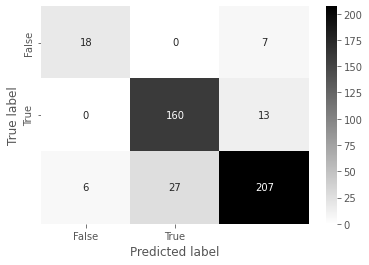

In [56]:
categories = ['False', 'True']
make_confusion_matrix(confusion_matrix(y_test, predict_test_mlp), categories=categories, cmap='binary')

In [57]:
print('Classification report')
print(classification_report(y_test, predict_test_mlp))

Classification report
              precision    recall  f1-score   support

        HIGH       0.75      0.72      0.73        25
         LOW       0.86      0.92      0.89       173
      MEDIUM       0.91      0.86      0.89       240

    accuracy                           0.88       438
   macro avg       0.84      0.84      0.84       438
weighted avg       0.88      0.88      0.88       438



Compute the Roc Curve for each class

In [58]:
one_hot_encoding = np.array(pd.get_dummies(y_test, columns = ['PriceLabel']))

In [59]:
probs = {}

probs["Neural Network"] = mlp.predict_proba(X_test)

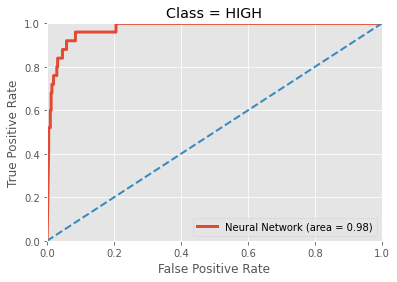

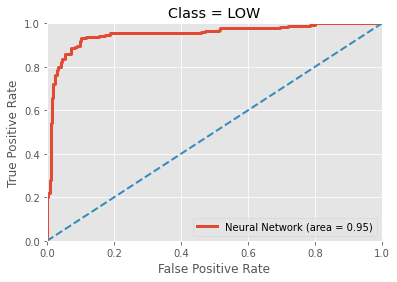

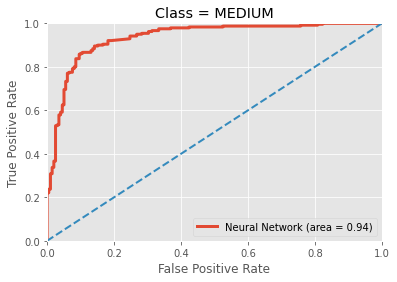

In [60]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs["Neural Network"][:, i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=3, label="Neural Network" + f' (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show()  

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3.11217054e-12 2.30911452e-14 9.23453219e-01 1.00820918e-21
 6.91228219e-07 5.85553566e-25 1.06730859e-19 2.22

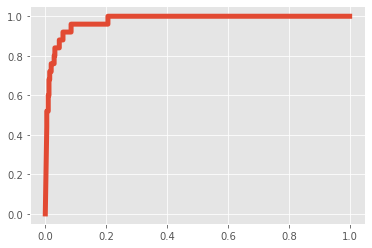

In [61]:
fpr = dict()
tpr = dict()
roc_auc = dict()
m = 0
for i in range(len(np.unique(y))):
    plt.figure()

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs["Neural Network"][:, i])
        
    print(one_hot_encoding[:, i])
    print(probs["Neural Network"][:, i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=5, label="" + f' (area = {roc_auc[i]:.2f})')
    m += 1
        
    if m==2:
        break
    break

In [62]:
one_hot_encoding[:, 0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
probs["Neural Network"][:, 0]

array([3.11217054e-12, 2.30911452e-14, 9.23453219e-01, 1.00820918e-21,
       6.91228219e-07, 5.85553566e-25, 1.06730859e-19, 2.22763018e-18,
       1.99921629e-17, 1.95553844e-15, 2.83547236e-19, 3.35008373e-10,
       8.54771201e-14, 4.19842983e-22, 1.67741130e-24, 3.68613439e-01,
       1.41869855e-16, 3.31038057e-03, 9.58986555e-01, 7.67621399e-14,
       1.58837370e-14, 1.22618534e-14, 2.53361294e-18, 2.99134617e-18,
       5.20044448e-15, 4.18374697e-21, 8.94285884e-01, 1.48981910e-19,
       5.81451589e-18, 5.04811337e-15, 5.08693203e-20, 9.23375955e-06,
       5.08024442e-16, 1.16002421e-14, 1.69123946e-16, 4.33855601e-17,
       2.84337752e-18, 1.35085066e-04, 3.70706067e-18, 9.54500617e-01,
       3.08612695e-24, 2.65181651e-26, 1.36128350e-20, 1.23293969e-16,
       4.42817385e-27, 4.29120916e-25, 4.90693074e-10, 2.36667158e-03,
       7.97701945e-14, 9.26139057e-16, 1.18411406e-10, 1.82491553e-17,
       2.78735005e-16, 1.63488865e-15, 5.73384696e-18, 1.20810104e-10,
      

In [64]:
roc_curve(one_hot_encoding[:, 0], probs["Neural Network"][:, 0])

(array([0.        , 0.00484262, 0.00484262, 0.00968523, 0.00968523,
        0.01210654, 0.01210654, 0.01452785, 0.01452785, 0.01937046,
        0.01937046, 0.02905569, 0.02905569, 0.031477  , 0.031477  ,
        0.04600484, 0.04600484, 0.05811138, 0.05811138, 0.08474576,
        0.08474576, 0.20581114, 0.20581114, 1.        ]),
 array([0.  , 0.44, 0.52, 0.52, 0.6 , 0.6 , 0.68, 0.68, 0.72, 0.72, 0.76,
        0.76, 0.8 , 0.8 , 0.84, 0.84, 0.88, 0.88, 0.92, 0.92, 0.96, 0.96,
        1.  , 1.  ]),
 array([1.95898656e+00, 9.58986555e-01, 9.56438883e-01, 9.50686927e-01,
        9.37134264e-01, 9.24998192e-01, 9.11763213e-01, 8.94285884e-01,
        6.39578649e-01, 3.15477179e-01, 1.77762233e-01, 5.51840418e-03,
        3.31038057e-03, 2.69544508e-03, 2.65215545e-03, 6.80106351e-04,
        3.28490870e-04, 5.05418630e-05, 2.55312559e-05, 6.83283479e-07,
        6.62836763e-07, 1.50700946e-11, 1.38447512e-11, 4.42817385e-27]))

### Adaboost

In [65]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
#Import scikit-learn metrics module for accuracy calculation

In [66]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=110, learning_rate=1)

# Train Adaboost Classifer
abc = abc.fit(X_train, y_train)

models.append(("AdaBoost", abc, abc.predict_proba(X_test), y_test, abc.predict(X_test)))

#Predict the response for test dataset
y_pred = abc.predict(X_test)

In [67]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


In [68]:
predict_train_abc = abc.predict(X_train)
predict_test_abc = abc.predict(X_test)

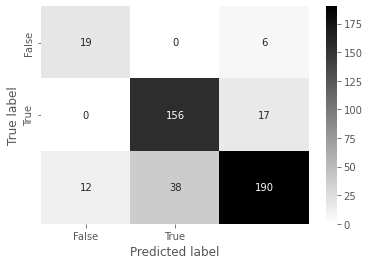

In [69]:
categories = ['False', 'True']
make_confusion_matrix(confusion_matrix(y_test, predict_test_abc), categories=categories, cmap='binary')

In [70]:
print('Classification report')
print(classification_report(y_test, predict_test_abc))

Classification report
              precision    recall  f1-score   support

        HIGH       0.61      0.76      0.68        25
         LOW       0.80      0.90      0.85       173
      MEDIUM       0.89      0.79      0.84       240

    accuracy                           0.83       438
   macro avg       0.77      0.82      0.79       438
weighted avg       0.84      0.83      0.83       438



In [71]:
probs["AdaBoost"] = abc.predict_proba(X_test)

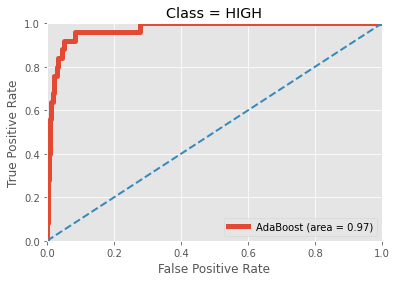

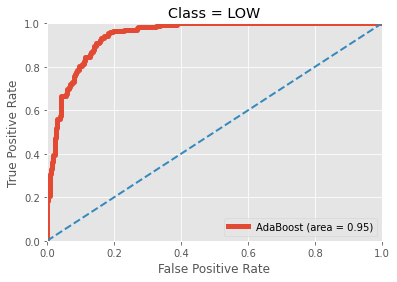

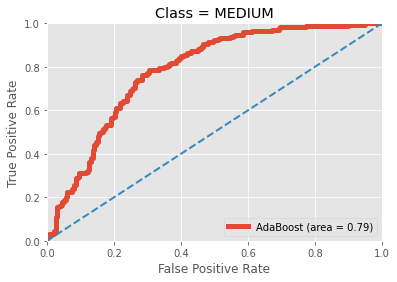

In [72]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs["AdaBoost"][:, i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=5, label="AdaBoost" + f' (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show() 

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0.33159715 0.23371515 0.40138407 0.2422613  0.3602729  0.17378336
 0.19840257 0.17997177 0.18536471 0.27985513

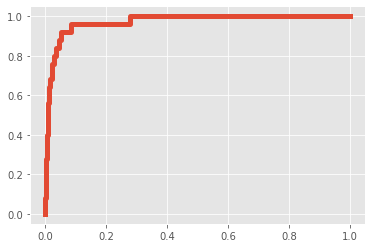

In [73]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs["AdaBoost"][:, i])
        
    print(one_hot_encoding[:, i])
    print(probs["AdaBoost"][:, i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=5, label="" + f' (area = {roc_auc[i]:.2f})')
    m += 1
        
    if m==2:
        break
    break

In [74]:
one_hot_encoding[:, 0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [75]:
probs["AdaBoost"][:, 0]

array([0.33159715, 0.23371515, 0.40138407, 0.2422613 , 0.3602729 ,
       0.17378336, 0.19840257, 0.17997177, 0.18536471, 0.27985513,
       0.18504331, 0.32833099, 0.30192395, 0.16124077, 0.24176414,
       0.39592593, 0.30278186, 0.41497591, 0.4547071 , 0.17316658,
       0.30050733, 0.2285283 , 0.18731731, 0.20489372, 0.23736176,
       0.19394899, 0.41598764, 0.27167518, 0.17089989, 0.23496355,
       0.19475197, 0.33795173, 0.18838695, 0.19538943, 0.16322326,
       0.1845549 , 0.24623381, 0.37138794, 0.33103057, 0.46072221,
       0.18225339, 0.16425862, 0.18547034, 0.24904338, 0.19668688,
       0.14853741, 0.37804568, 0.31299801, 0.26087393, 0.2803498 ,
       0.37372356, 0.2240109 , 0.19233909, 0.18292391, 0.24789633,
       0.34476089, 0.18523403, 0.24866078, 0.18736733, 0.19572733,
       0.17244117, 0.17498084, 0.37471579, 0.21242556, 0.16911641,
       0.38538324, 0.3573989 , 0.18366744, 0.1636305 , 0.28591173,
       0.27041025, 0.16664027, 0.24322379, 0.260168  , 0.35760

In [76]:
roc_curve(one_hot_encoding[:, 0], probs["AdaBoost"][:, 0])

(array([0.        , 0.        , 0.        , 0.00242131, 0.00242131,
        0.00484262, 0.00484262, 0.00726392, 0.00726392, 0.00968523,
        0.00968523, 0.01210654, 0.01210654, 0.01694915, 0.01694915,
        0.02179177, 0.02179177, 0.02905569, 0.02905569, 0.03389831,
        0.03389831, 0.04358354, 0.04358354, 0.05084746, 0.05084746,
        0.08474576, 0.08474576, 0.27845036, 0.27845036, 0.46246973,
        0.46731235, 0.58595642, 0.59079903, 1.        ]),
 array([0.  , 0.04, 0.08, 0.08, 0.28, 0.28, 0.4 , 0.4 , 0.52, 0.52, 0.56,
        0.56, 0.64, 0.64, 0.68, 0.68, 0.76, 0.76, 0.8 , 0.8 , 0.84, 0.84,
        0.88, 0.88, 0.92, 0.92, 0.96, 0.96, 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  ]),
 array([1.52709766, 0.52709766, 0.46638211, 0.46072221, 0.44383487,
        0.4438209 , 0.43750006, 0.43623621, 0.43004672, 0.42982703,
        0.42644916, 0.41598764, 0.41016499, 0.40841521, 0.40728938,
        0.4023916 , 0.40033024, 0.39592593, 0.39414726, 0.38745087,
        0.38538324, 0.37

## Evaluation

In [103]:
import operator

accuracy = {}

for model in models:
    accuracy[model[0]] = metrics.accuracy_score(model[3], model[4])
    
sorted_accuracy = sorted(accuracy.items(), key=operator.itemgetter(1), reverse=True)

for x in sorted_accuracy:
     print("Accuracy " + str(x[0]) + ": " + str(x[1]))

Accuracy Neural Network: 0.8789954337899544
Accuracy Random Forest: 0.8561643835616438
Accuracy AdaBoost: 0.8333333333333334


Compare roc curve models

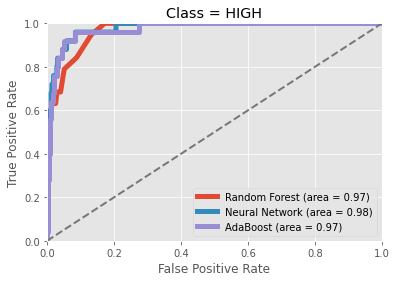

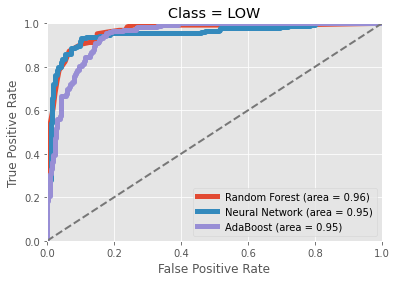

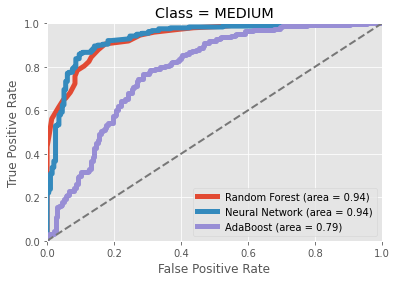

In [187]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()
    for model in models:
            one_hot_encoding = np.array(pd.get_dummies(model[3], columns = ['PriceLabel']))
        
            fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], model[2][:, i])

            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], lw=5, label=model[0] + f' (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show()  

[0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

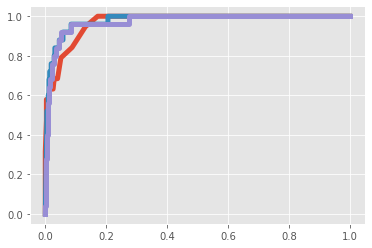

In [188]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()

    for model in models:
        one_hot_encoding = np.array(pd.get_dummies(model[3], columns = ['PriceLabel']))
        
        fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], model[2][:, i])
        
        print(one_hot_encoding[:, i])
        
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i], lw=5, label=model[0] + f' (area = {roc_auc[i]:.2f})')
    break


#### Business goal
###### Find the attributes correlated to the price of the houses

We'll use the Neural Network model to find the features are related with the price 

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

def knn_train_test(train_col, target_col, data):
    """ Used 50% of the data to train a knn-mmodel and computes
        the r2 score based on the remaining 50% of the data
    Args:
        train_col(str): name of the column which should be used as feature
        target_col(str): name of the target column which should be predicted
        data(obj): pandas dataframe which contains the data
    Returns:
        r2(float): r2 score
    """
    
    # initialize knn regressor
    knn = KNeighborsRegressor()
    np.random.seed(41)
        
    # Permute the order in the data
    shuffled_index = np.random.permutation(data.index)
    rand_data = data.reindex(shuffled_index)

    # Define first half of the data
    last_train_row = int(len(rand_data) / 2)
    
    # Select the first half and set as training set
    # Select the second half and set as test set
    train_data = rand_data.iloc[0:last_train_row]
    test_data = rand_data.iloc[last_train_row:]
    
    # Fit a KNN model using the default k value
    knn.fit(train_data[[train_col]], train_data[target_col])
    
    # Make predictions using model
    prediction = knn.predict(test_data[[train_col]])
    
    # Calculate r2 score
    r2 = r2_score(test_data[target_col], prediction)

    return r2

In [3]:
def forest_train_test(train_col, target_col, data):
    """ Used 50% of the data to train a knn-mmodel and computes
        the r2 score based on the remaining 50% of the data
    Args:
        train_col(str): name of the column which should be used as feature
        target_col(str): name of the target column which should be predicted
        data(obj): pandas dataframe which contains the data
    Returns:
        r2(float): r2 score
    """
    
    X = housePrice.drop('PriceLabel', axis=1)
    y = housePrice['PriceLabel']

    ohe = OneHotEncoder()
    X_encoded = ohe.fit_transform(X)
    X = X_encoded

    kf = KFold(n_splits=5)
    # the n_estimators parameter specifies the number of decision trees in the random forest
    rfc = RandomForestClassifier(n_estimators=30)
    best_score = 0


    for train_index, test_index in kf.split(X):
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train, X_test = X[train_index], X[test_index]

        rfc.fit(X_train, y_train)
        y_pred = rfc.predict(X_test)
        score=accuracy_score(y_test, y_pred)
        if score > best_score:
            best_score = score
            best_model = rfc
            print(best_score)

    dump(best_model, 'random_forest.joblib')
    
    model = joblib.load('random_forest.joblib')

    # Predict the test data
    y_pred = model.predict(X_test)
    
    
    # Calculate r2 score
    r2 = r2_score(y_test, y_pred)

    return r2



In [4]:
from sklearn.metrics import mean_squared_error, r2_score

def nn_train_test(train_col, target_col, data):
    
    nn = MLPClassifier(hidden_layer_sizes=(5,5), 
                            activation='relu', 
                            random_state=1,
                            alpha=0.030888435964774818,
                            max_iter=500,
                            solver='sgd', 
                            tol=1e-5,
                            learning_rate_init=0.1, 
                            verbose=False)
    
    np.random.seed(41)
        
    # Permute the order in the data
    shuffled_index = np.random.permutation(data.index)
    rand_data = data.reindex(shuffled_index)

    # Define first half of the data
    last_train_row = int(len(rand_data) / 2)
    
    # Select the first half and set as training set
    # Select the second half and set as test set
    train_data = rand_data.iloc[0:last_train_row]
    test_data = rand_data.iloc[last_train_row:]
    
    # Fit a KNN model using the default k value
    nn.fit(train_data[[train_col]], train_data[target_col])
    
    # Make predictions using model
    prediction = nn.predict(test_data[[train_col]])
    
    # Calculate r2 score
    r2 = r2_score(test_data[target_col], prediction)

    return r2

We will restrict our analysis to the continuous attributes, although it would be possible to extend the analysis to the non-continuous ones; the company wants to know te attributes non-continous?

In [5]:
rmse_results = dict()

housePriceWithoutLabel = pd.read_csv('train.csv', keep_default_na=False, low_memory=False)

continuous_values_cols = ['LotFrontage', 'MasVnrArea', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                          'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                          'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                          'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                          'PoolArea', 'SalePrice']

housePriceContinuousValues = housePriceWithoutLabel[continuous_values_cols]
housePriceContinuousValues.head()

# empty values
#for i in continuous_values_cols:
#    for j in housePriceContinuousValues[i]:
#        if(j == 'NA'):
#            print(i)
#            break

,LotFrontage,MasVnrArea,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
0,65,196,8450,706,0,150,856,856,854,0,...,0,2,548,0,61,0,0,0,0,208500
1,80,0,9600,978,0,284,1262,1262,0,0,...,1,2,460,298,0,0,0,0,0,181500
2,68,162,11250,486,0,434,920,920,866,0,...,1,2,608,0,42,0,0,0,0,223500
3,60,0,9550,216,0,540,756,961,756,0,...,1,3,642,0,35,272,0,0,0,140000
4,84,350,14260,655,0,490,1145,1145,1053,0,...,1,3,836,192,84,0,0,0,0,250000


We'll remove the missing values

In [6]:
housePriceContinuousValues = housePriceContinuousValues.replace("NA", np.nan)
housePriceContinuousValues.head()

,LotFrontage,MasVnrArea,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
0,65,196,8450,706,0,150,856,856,854,0,...,0,2,548,0,61,0,0,0,0,208500
1,80,0,9600,978,0,284,1262,1262,0,0,...,1,2,460,298,0,0,0,0,0,181500
2,68,162,11250,486,0,434,920,920,866,0,...,1,2,608,0,42,0,0,0,0,223500
3,60,0,9550,216,0,540,756,961,756,0,...,1,3,642,0,35,272,0,0,0,140000
4,84,350,14260,655,0,490,1145,1145,1053,0,...,1,3,836,192,84,0,0,0,0,250000


Because "NA" is of string type, columns containing this value were cast to  object data type; let us cast the columns to float type

In [7]:
housePriceContinuousValues = housePriceContinuousValues.astype('float')
housePriceContinuousValues.isnull().sum()

LotFrontage      259
MasVnrArea         8
LotArea            0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
SalePrice          0
dtype: int64

We'll remove the row where the value SalePrice is missing

In [8]:
housePriceContinuousValues = housePriceContinuousValues.dropna(subset=['SalePrice'])
housePriceContinuousValues.isnull().sum()

LotFrontage      259
MasVnrArea         8
LotArea            0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
SalePrice          0
dtype: int64

The missing values in other columns are repleacing with column means

In [9]:
housePriceContinuousValues = housePriceContinuousValues.fillna(housePriceContinuousValues.mean())
housePriceContinuousValues.isnull().sum()

LotFrontage      0
MasVnrArea       0
LotArea          0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
SalePrice        0
dtype: int64

We'll normalize all the features in such a way that they are between 0 and 1

In [10]:
target = housePriceContinuousValues['SalePrice']
housePriceContinuousValues = (housePriceContinuousValues - housePriceContinuousValues.min())/(housePriceContinuousValues.max() - housePriceContinuousValues.min())
housePriceContinuousValues['SalePrice'] = target
housePriceContinuousValues.describe()

,LotFrontage,MasVnrArea,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.167979,0.064803,0.043080,0.078604,0.031580,0.242826,0.173065,0.190139,0.168035,0.010218,...,0.204338,0.441781,0.333554,0.109970,0.085302,0.039772,0.006712,0.031377,0.003738,180921.195890
std,0.075425,0.112856,0.046653,0.080811,0.109443,0.189155,0.071801,0.088708,0.211394,0.085005,...,0.214889,0.186829,0.150779,0.146253,0.121126,0.110723,0.057711,0.116161,0.054441,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,0.133562,0.000000,0.029229,0.000000,0.000000,0.095462,0.130237,0.125746,0.000000,0.000000,...,0.000000,0.250000,0.235896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,0.167979,0.000000,0.038227,0.067948,0.000000,0.204409,0.162275,0.172786,0.000000,0.000000,...,0.333333,0.500000,0.338505,0.000000,0.045704,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,0.198630,0.102656,0.048150,0.126196,0.000000,0.345890,0.212480,0.242600,0.352542,0.000000,...,0.333333,0.500000,0.406206,0.196033,0.124314,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,755000.000000


We'll use the function to train our Neural Network model for each feature seperate and collect the results

In [11]:
train_cols = housePriceContinuousValues.columns.drop('SalePrice')

# For each column (without price), train a model, return RMSE value
# and add to the dictionary rmse_results.

# tentativo senza il for
for col in train_cols: 
    rmse_val = knn_train_test(col, 'SalePrice', housePriceContinuousValues)
    # print(rmse_val)
    # rmse_val = nn_train_test(col, 'SalePrice', housePriceContinuousValues)
    # rmse_val = forest_train_test(col, 'SalePrice', housePriceContinuousValues)
    # print(rmse_val)
    rmse_results[col] = rmse_val


# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values(ascending=False)

TotalBsmtSF      0.449145
GarageCars       0.435689
GrLivArea        0.420365
GarageArea       0.380455
1stFlrSF         0.343478
FullBath         0.281466
BsmtFinSF1       0.244958
TotRmsAbvGrd     0.226534
2ndFlrSF         0.208176
LotArea          0.128462
Fireplaces       0.126315
MasVnrArea       0.071769
LotFrontage      0.064328
HalfBath         0.037536
WoodDeckSF       0.016125
BsmtFullBath     0.001790
BsmtFinSF2      -0.037667
BsmtUnfSF       -0.051635
OpenPorchSF     -0.066261
LowQualFinSF    -0.139911
ScreenPorch     -0.160330
EnclosedPorch   -0.160779
3SsnPorch       -0.258920
PoolArea        -0.261554
BsmtHalfBath    -0.374303
dtype: float64

Let us also compute some correlations and display some scatterplots

In [ ]:
fig, axs = plt.subplots(6, figsize=(15, 40))

x = 0
for i in ['TotalBsmtSF', 'GarageCars', 'GrLivArea', '3SsnPorch', 'PoolArea', 'BsmtHalfBath']:
    axs[x].scatter(housePriceContinuousValues[i], housePriceContinuousValues['SalePrice'])
    for ax in axs.flat:
        ax.set(xlabel=i, ylabel = "SalePrice")
    axs[x].set_title("SalePrice vs " + i)
    x += 1
